# Udemy Course Data Exploration

Coded by Luna McBride

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from wordcloud import WordCloud, STOPWORDS #wordcloud 
import matplotlib.pyplot as plt #plotting
%matplotlib inline

plt.rcParams['figure.figsize'] = (15,10) #Set the default figure size
plt.style.use('ggplot') #Set the plotting method

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finance-accounting-courses-udemy-13k-course/udemy_output_All_Finance__Accounting_p1_p626.csv


In [2]:
udemy = pd.read_csv("../input/finance-accounting-courses-udemy-13k-course/udemy_output_All_Finance__Accounting_p1_p626.csv") #Get the Udemy data
udemy.head() #Take a peek at the data

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


---

# Check for Null Values

In [3]:
print(udemy.isnull().any()) #Check for null values

id                              False
title                           False
url                             False
is_paid                         False
num_subscribers                 False
avg_rating                      False
avg_rating_recent               False
rating                          False
num_reviews                     False
is_wishlisted                   False
num_published_lectures          False
num_published_practice_tests    False
created                         False
published_time                  False
discount_price__amount           True
discount_price__currency         True
discount_price__price_string     True
price_detail__amount             True
price_detail__currency           True
price_detail__price_string       True
dtype: bool


In [4]:
print(udemy.loc[udemy["price_detail__amount"].isnull()]) #Check where the price is null

            id                                              title  \
11484   133536               Stock Market Investing for Beginners   
11485   151668                 Introduction to Financial Modeling   
11486  1016996  Introduction to Corporate Finance (Mergers & A...   
11487   806122             Learn and Master the Basics of Finance   
11488   191854                           Stock Market Foundations   
...        ...                                                ...   
13603  3005408                      מושגים בסיסיים באופציות חלק ב   
13604  3467284                            Programa de Integridade   
13605  3368222  Goodwill and Method of Calculating Goodwill (A...   
13606  3211345                                Poderoso Investidor   
13607  2935720         Acabou a Previdência e agora? -  Volume 03   

                                                     url  is_paid  \
11484   /course/the-beginners-guide-to-the-stock-market/    False   
11485           /course/financial

The only null values appear to be prices on rows where the courses are not paid. I will be dropping several of these rows, but the others I will just replace with 0. 

---

# Drop Column/Fix Null

In [5]:
udemy = udemy.drop(columns = {"created", "discount_price__amount", "discount_price__currency", "discount_price__price_string",
                             "price_detail__price_string", "price_detail__currency"}) #Drop several unnecessary rows
udemy.head() #Take a peek at the dataframe

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,published_time,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-04-06T05:16:11Z,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-23T16:59:49Z,8640.0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-11-14T23:58:14Z,8640.0
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2016-01-21T01:38:48Z,8640.0
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2016-01-11T21:39:33Z,8640.0


In [6]:
udemy["price_detail__amount"] = udemy["price_detail__amount"].apply(lambda x: 0 if pd.isnull(x) else x) #Change null values to 0
print(udemy.isnull().any()) #Check for null values

id                              False
title                           False
url                             False
is_paid                         False
num_subscribers                 False
avg_rating                      False
avg_rating_recent               False
rating                          False
num_reviews                     False
is_wishlisted                   False
num_published_lectures          False
num_published_practice_tests    False
published_time                  False
price_detail__amount            False
dtype: bool


In [7]:
udemy["usd"] = udemy["price_detail__amount"].apply(lambda x: x*0.014) #Add the prices in USD
udemy.head() #Take a peek at the dataframe

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,published_time,price_detail__amount,usd
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-04-06T05:16:11Z,8640.0,120.96
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-23T16:59:49Z,8640.0,120.96
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-11-14T23:58:14Z,8640.0,120.96
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2016-01-21T01:38:48Z,8640.0,120.96
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2016-01-11T21:39:33Z,8640.0,120.96


---

# Update Column Names

In [8]:
columns = udemy.columns #Take the current column names
#Create a list of the new column names I want to give
newColumns = ["id", "title", "url", "costsMoney", "subCount", "avgRating", "recentRating", "rating", "reviewNum", 
              "wishlisted", "lectureNum", "testNum", "published", "priceRupees", "priceUSD"]

columnChange = dict(zip(columns, newColumns)) #Zip together the column names, then put them into a dictionary of current : new
udemy = udemy.rename(columns = columnChange) #Rename the columns with the dictionary
udemy.head() #Take a peek at the dataframe

,id,title,url,costsMoney,subCount,avgRating,recentRating,rating,reviewNum,wishlisted,lectureNum,testNum,published,priceRupees,priceUSD
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-04-06T05:16:11Z,8640.0,120.96
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-23T16:59:49Z,8640.0,120.96
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-11-14T23:58:14Z,8640.0,120.96
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2016-01-21T01:38:48Z,8640.0,120.96
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2016-01-11T21:39:33Z,8640.0,120.96


---

# Build a WordCloud from the Titles

Source: https://www.geeksforgeeks.org/generating-word-cloud-python/

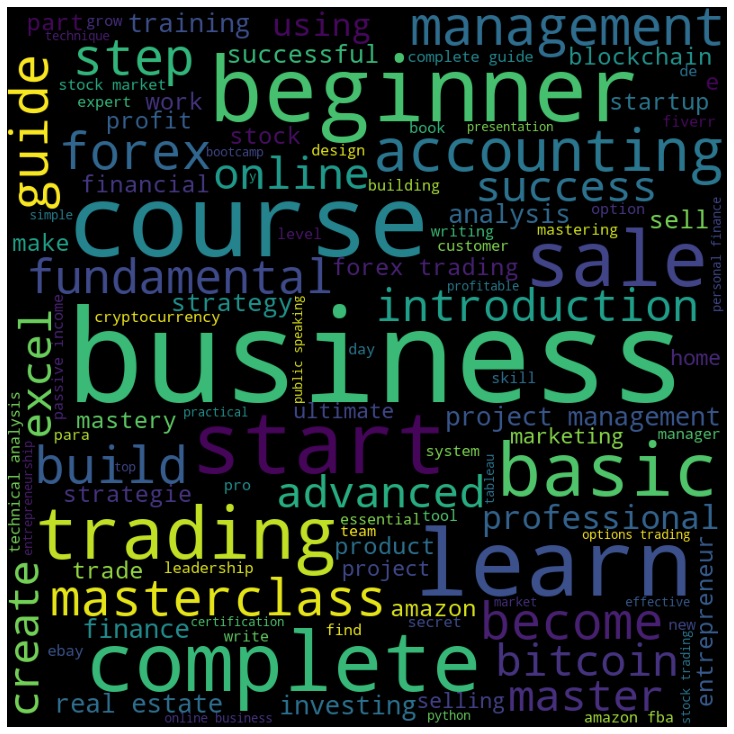

In [9]:
titleWords = "" #Make a holder variable for words to make a word cloud
stopwords = set(STOPWORDS) #Get a set of the stopwords to remove
titles = udemy["title"] #Get the titles to look through
  
#For each title, get the words for the cloud
for title in titles: 
    tokens = title.split() #Split the titles into words
    length = len(tokens) #Get the number of words to loop through
    
    #For each word, make the word lower case
    for i in range(0, length): 
        tokens[i] = tokens[i].lower() #Make the current word lowercase
      
    titleWords += " ".join(tokens) + " " #Add the word to the set of words for the cloud

cloud = WordCloud(width = 800, height = 800, #Build a word cloud of size 800x800 
            stopwords = stopwords, #Set the stopwords to remove
            min_font_size = 14).generate(titleWords) #Set the min size and generate the cloud
  
plt.figure(figsize = (10, 10), facecolor = None) #Build an 10x10 figure
plt.imshow(cloud) #Display the cloud
plt.axis("off") #Remove the axis
plt.tight_layout(pad = 0) #Remove the padding from the grid
  
plt.show() #Show the cloud

---

# Lecture Number vs Rating

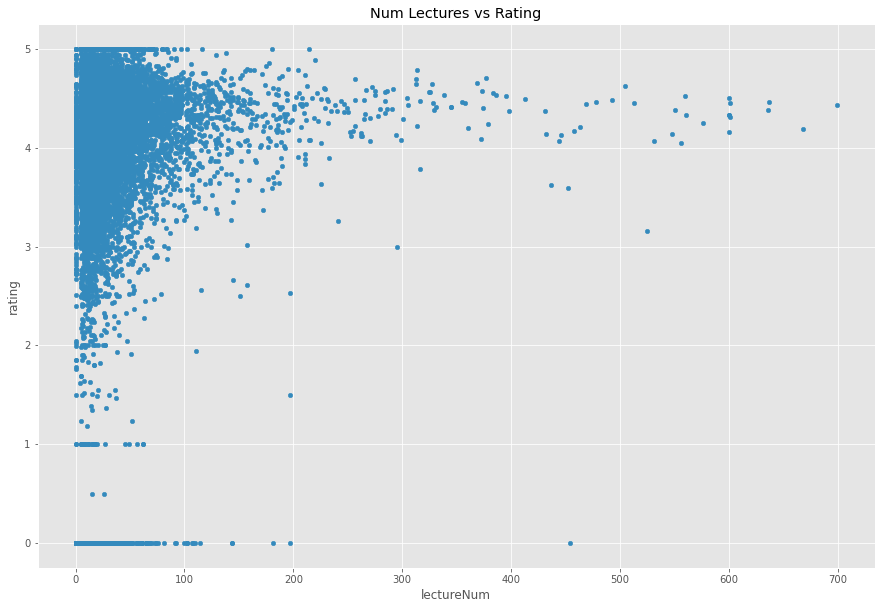

In [10]:
udemy.plot.scatter(x = "lectureNum", y = "rating", title = "Num Lectures vs Rating") #Build a scatterplot comparing rating and lecture number

It appears a low number of lectures does not indicate rating. Once there are 200 or more lectures, however, it is almost guarenteed to have a rating above 3.

---

# Test Number vs Rating

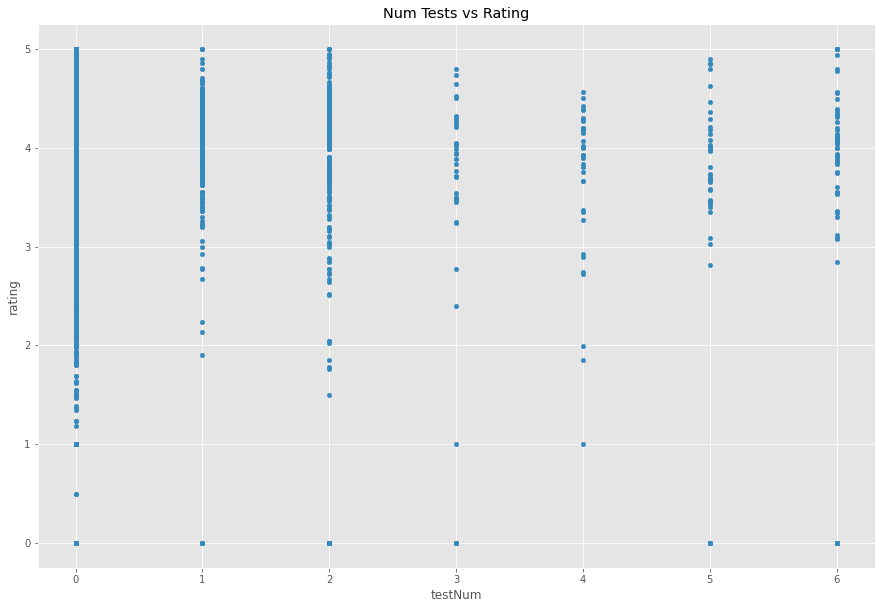

In [11]:
udemy.plot.scatter(x = "testNum", y = "rating", title = "Num Tests vs Rating") #Build a scatterplot comparing rating and test number

Higher test numbers appear to have a higher rating, with exception to some 0 ratings (likely untaken courses)

---

# Price vs Rating

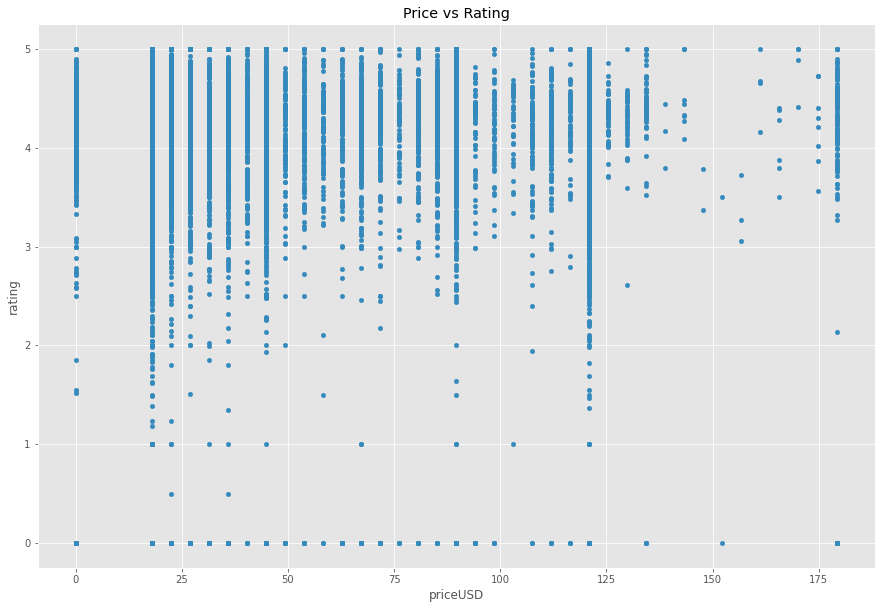

In [12]:
udemy.plot.scatter(x = "priceUSD", y = "rating", title = "Price vs Rating") #Build a scatterplot comparing rating and price

It does not seem price is a good indicator of quality with Udemy. While there are less lower rated courses at high price points, there is a steady amount of high and low rated courses throughout the whole graph.

---

# Review Number/Subscriber Count (Popularity) vs Rating

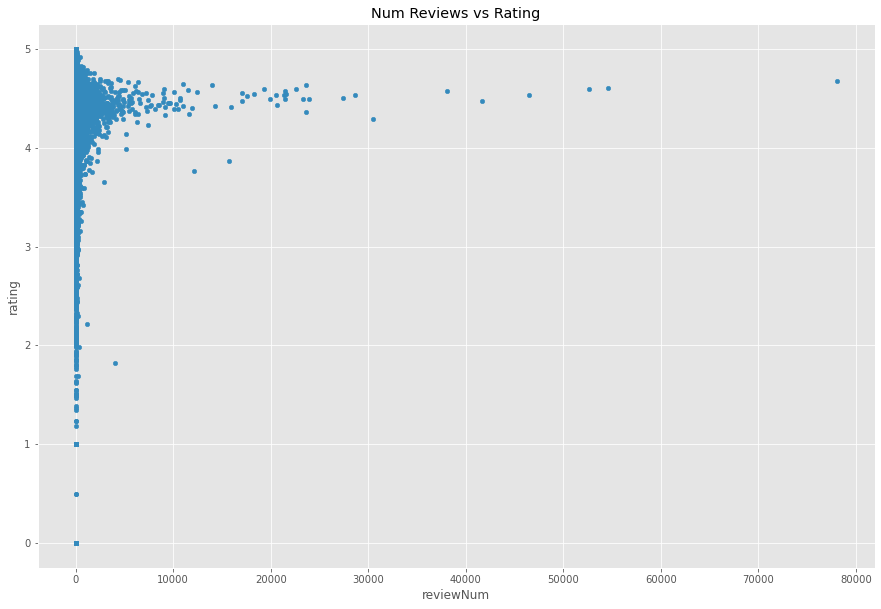

In [13]:
udemy.plot.scatter(x = "reviewNum", y = "rating", title = "Num Reviews vs Rating") #Build a scatterplot comparing rating and review number

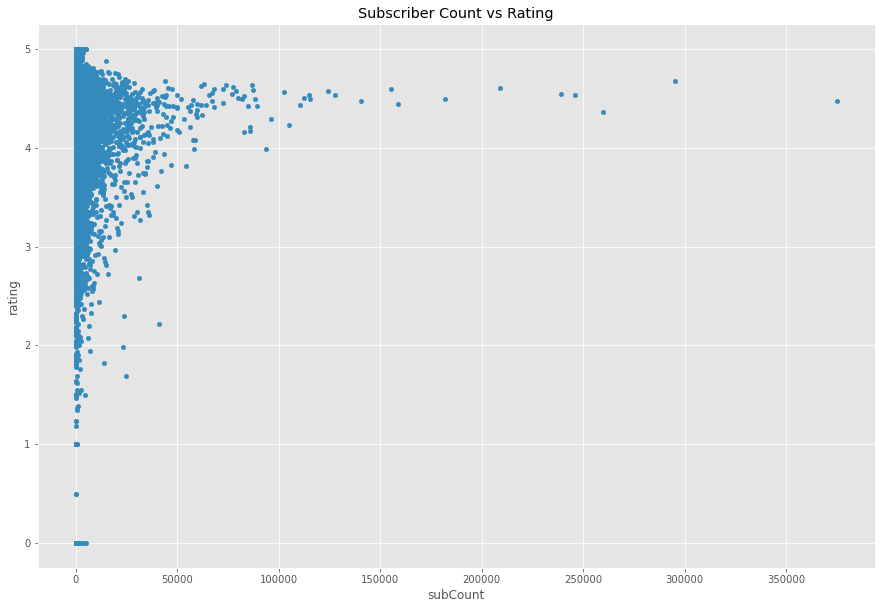

In [14]:
udemy.plot.scatter(x = "subCount", y = "rating", title = "Subscriber Count vs Rating") #Build a scatterplot comparing rating and Sub Count

It appears as a course gets sufficiently high review/subscriber counts (and thus are more popular), they tend to get overall higher ratings. This turning point appears to be 5000 ratings and 50000 subscribers.

---

# Num Lectures vs Price

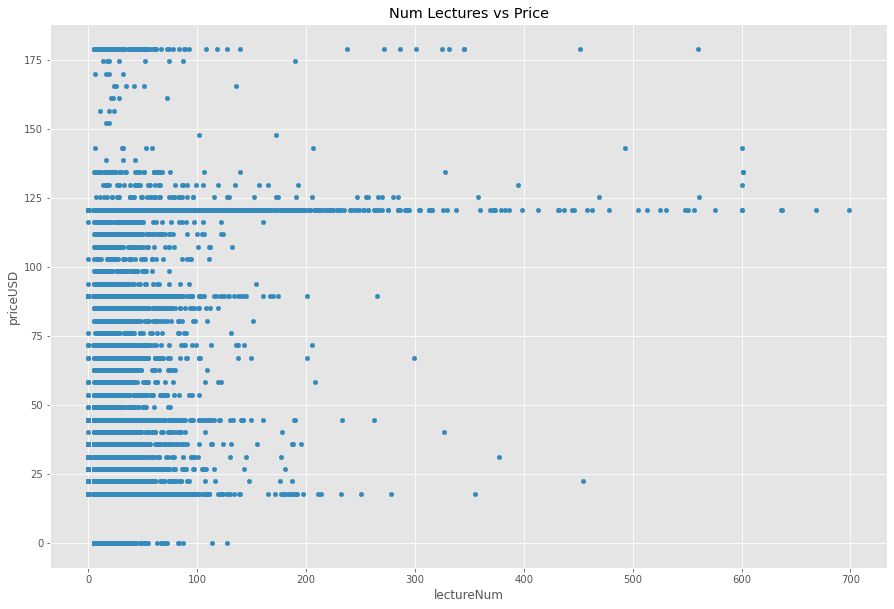

In [15]:
udemy.plot.scatter(x = "lectureNum", y = "priceUSD", title = "Num Lectures vs Price") #Build a scatterplot comparing price and lecture number

Price and Lecture Number appear to have no corelation. I had assumed a lower price would imply less content, but apparently not.

---

# The Best Courses

Review count has been shown to be an important metric in showing the best classes. So, which classes rate above 4.5 with more than 20000 reviews?

In [16]:
high = udemy.loc[udemy["reviewNum"] > 20000] #Take rows with review counts higher than 20000 into the "high" dataframe
high = high.loc[high["rating"] > 4.5] #Cut out courses from the high dataframe that are less than 4.5
high #Show all of the best Udemy courses

,id,title,url,costsMoney,subCount,avgRating,recentRating,rating,reviewNum,wishlisted,lectureNum,testNum,published,priceRupees,priceUSD
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-04-06T05:16:11Z,8640.0,120.96
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-23T16:59:49Z,8640.0,120.96
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-11-14T23:58:14Z,8640.0,120.96
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2016-01-21T01:38:48Z,8640.0,120.96
5,1208634,Microsoft Power BI - A Complete Introduction [...,/course/powerbi-complete-introduction/,True,124180,4.56228,4.57676,4.57676,38093,False,275,0,2017-05-15T18:48:54Z,8640.0,120.96
7,321410,Beginner to Pro in Excel: Financial Modeling a...,/course/beginner-to-pro-in-excel-financial-mod...,True,127680,4.54034,4.53346,4.53346,28665,False,275,0,2014-11-25T23:00:40Z,8640.0,120.96
8,673654,Become a Product Manager | Learn the Skills & ...,/course/become-a-product-manager-learn-the-ski...,True,112572,4.50386,4.50080,4.50080,27408,False,144,0,2016-03-17T17:04:59Z,8640.0,120.96
10,1570206,Microsoft Power BI - Up & Running With Power B...,/course/microsoft-power-bi-up-running-with-pow...,True,86715,4.61951,4.63301,4.63301,23580,False,117,0,2018-04-26T17:06:36Z,8640.0,120.96
12,613808,Leadership: Practical Leadership Skills,/course/practical-leadership/,True,68148,4.56870,4.59302,4.59302,22595,False,43,0,2015-10-09T20:54:44Z,5760.0,80.64
13,1288044,The Complete Foundation Stock Trading Course,/course/foundation-course/,True,76812,4.53878,4.54203,4.54203,21537,False,41,0,2017-08-25T00:48:17Z,8640.0,120.96


The best courses seem to be leadership, data analysis, and personal investment type courses. This is a financial dataset, so it makes sense. Though, the inclusion of Hadoop and Big Data is really interesting, as I pictured that as a heavy data science concept rather than financial analysis.